<a href="https://colab.research.google.com/github/dhnjun9/Yolov5_custom_train/blob/main/bongsik_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#드라이브 마운트

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#환경셋팅

In [ ]:
# Yolov5 github 레포지토리 clone
!git clone https://github.com/ultralytics/yolov5.git

# 필요한 모듈 설치
!pip install -U -r yolov5/requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 10902, done.
remote: Total 10902 (delta 0), reused 0 (delta 0), pack-reused 10902
Receiving objects: 100% (10902/10902), 11.00 MiB | 26.43 MiB/s, done.
Resolving deltas: 100% (7528/7528), done.
     |████████████████████████████████| 11.2 MB 5.3 MB/s 
     |████████████████████████████████| 15.7 MB 35.7 MB/s 
     |████████████████████████████████| 60.4 MB 31 kB/s 
     |████████████████████████████████| 4.3 MB 36.2 MB/s 
     |████████████████████████████████| 596 kB 32.5 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
     |██████████████████████████████▎ | 834.1 MB 1.4 MB/s eta 0:00:36tcmalloc: large alloc 1147494400 bytes == 0x564b3cac2000 @  0x7ff4fc994615 0x564ad72953bc 0x564ad737618a 0x564ad72981cd 0x564ad738ab3d 0x564ad730c458 0x564ad730702f 0x564ad7299aba 0x564ad730c2c0 0x564ad730702f 0x564ad7299aba 0x564ad7308cd4 0x564ad738b986 0x564ad7308350 0x564ad73

In [ ]:
import torch
from IPython.display import Image  # 이미지 표시를 위한 import

#파이토치 버전 확인, cuda device properties 확인
print('torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

torch 1.10.2+cu102 _CudaDeviceProperties(name='Tesla K80', major=3, minor=7, total_memory=11441MB, multi_processor_count=13)


#데이터셋 가져오기

In [1]:
!mkdir datasets
%cd /content/datasets/

/content/datasets


In [ ]:
# 구글드라이브에 있는 zip파일 복사
!cp /content/drive/MyDrive/Bongsik/Bongsik.zip /content/datasets

!unzip Bongsik.zip

Archive:  Bongsik.zip
   creating: train_bong/
   creating: train_bong/images/
  inflating: train_bong/images/2371937D-2FDA-47AA-9CE7-7A25A822411D_jpeg.rf.9d787265c2c01204029e2037ef67f38b.jpg  
  inflating: train_bong/images/Facetune_23-06-2021-11-19-07_jpg.rf.af857c54d2ef146c44b2912a5708af93.jpg  
  inflating: train_bong/images/Facetune_23-06-2021-11-19-07_jpg.rf.b34594186a6c6ab86868195094a1817b.jpg  
  inflating: train_bong/images/IMG_0528_JPG.rf.1538314a5210d905f77f48b747ae4217.jpg  
  inflating: train_bong/images/IMG_0528_JPG.rf.b466ea982e71b90d1c62c5dfb24e1a18.jpg  
  inflating: train_bong/images/IMG_0529_JPG.rf.be61505cecd73687c3775b004e3b19fc.jpg  
  inflating: train_bong/images/IMG_0529_JPG.rf.ef16472e59835c622c4b98a3f6f625d3.jpg  
  inflating: train_bong/images/IMG_0546_JPG.rf.1b1d0379be5a67e00e127205f48ebe86.jpg  
  inflating: train_bong/images/IMG_0546_JPG.rf.c0cd7f3321bf5e45e294a1fd0a8e717b.jpg  
  inflating: train_bong/images/IMG_0607_JPG.rf.221589014b59948b180e5fd7338b918

#data.taml파일 수정

In [ ]:
from glob import glob

train_img_list = glob('./train_bong/images/*.jpg') + glob('./train_bong/images/*.jpeg')
valid_img_list = glob('./valid_bong/images/*.jpg') + glob('./valid_bong/images/*.jpeg')

with open('./train.txt', 'w') as f:
	f.write('\n'.join(train_img_list) + '\n')
    
with open('./valid.txt', 'w') as f:
	f.write('\n'.join(valid_img_list) + '\n')

#data,yaml파일 수정
#train: /content/datasets/train.txt
#val: /content/datasets/valid.txt

#학습

In [ ]:
!python /content/yolov5/train.py --img 320 --batch 16 --epochs 30 --data /content/datasets/data.yaml --weights yolov5x.pt --name result_bong --cfg /content/yolov5/models/yolov5x.yaml

train: weights=yolov5x.pt, cfg=/content/yolov5/models/yolov5x.yaml, data=/content/datasets/data.yaml, hyp=../yolov5/data/hyps/hyp.scratch.yaml, epochs=30, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=../yolov5/runs/train, name=result_bong, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-243-g9c513ca torch 1.10.2+cu102 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma

In [ ]:
#구글 드라이브로 모델 복사
!cp -r /content/yolov5/runs/train/result_bong /content/drive/MyDrive/models

#학습시킨 weight 적용시켜보기

In [ ]:
!python /content/yolov5/detect.py --weights /content/yolov5/runs/train/result_bong/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/img/test2.jpg

detect: weights=['/content/yolov5/runs/train/result_bong/weights/best.pt'], source=/content/drive/MyDrive/img/test2.jpg, data=../yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=../yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-243-g9c513ca torch 1.10.2+cu102 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/img/test2.jpg: 640x640 1 bongsik, Done. (0.031s)
Speed: 0.8ms pre-process, 30.7ms inference, 2.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to ../yolov5/runs/detect/exp2


#이미지 확인

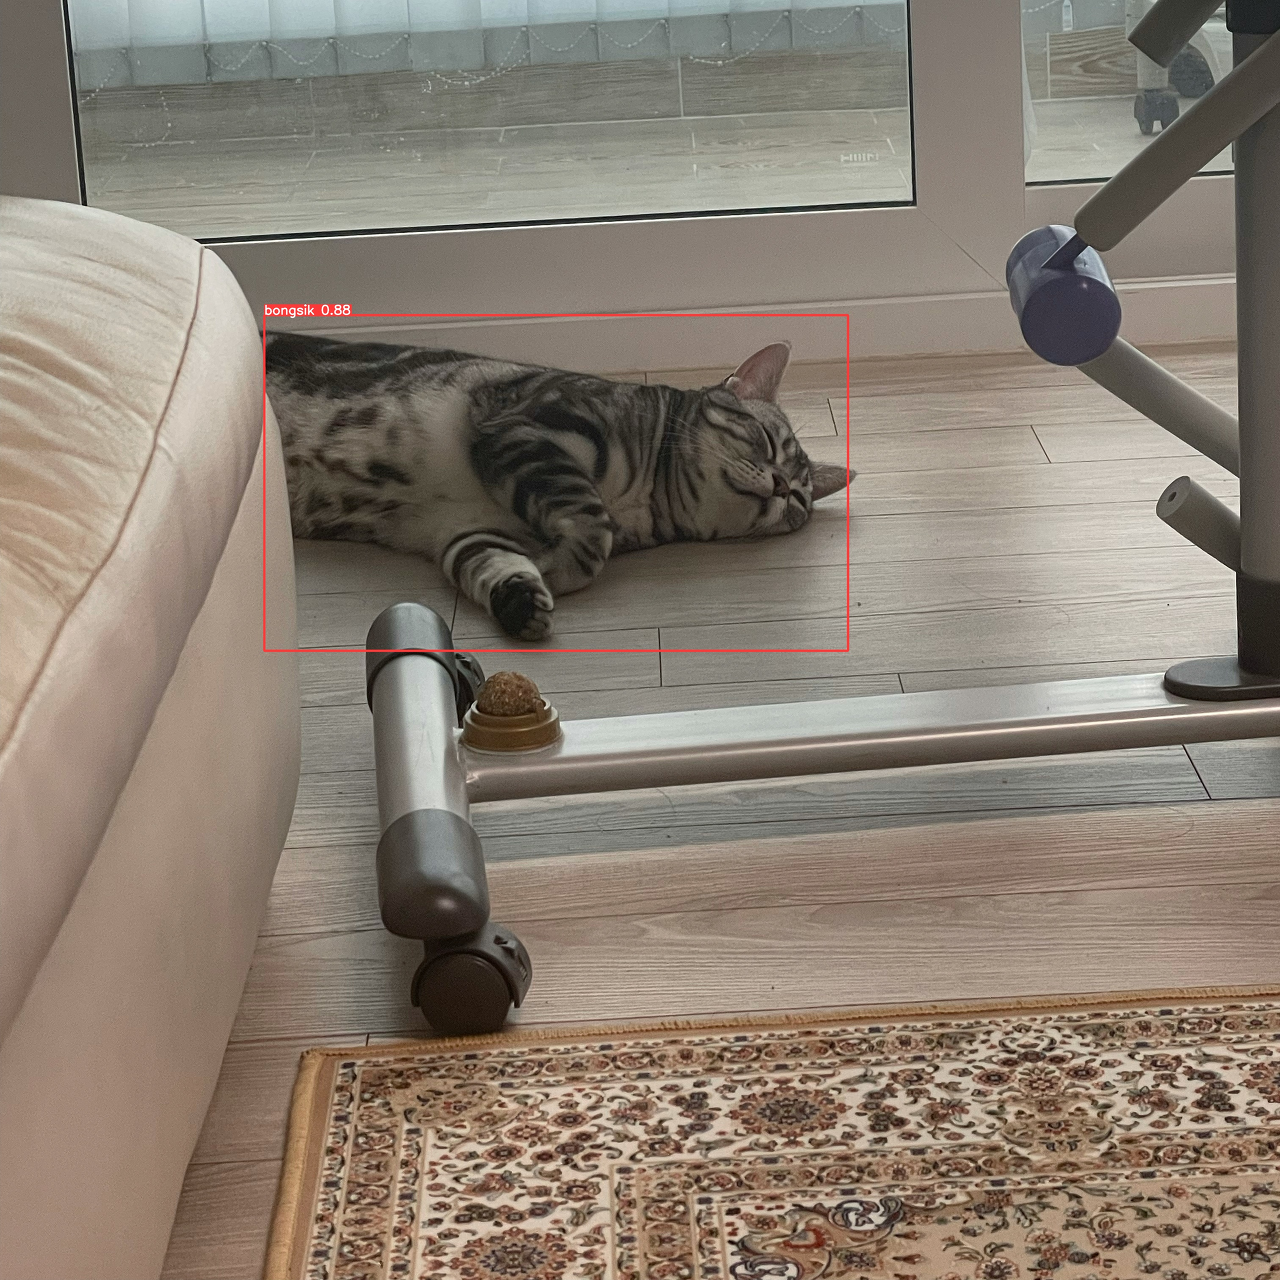

In [2]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/yolov5/runs/detect/exp/test2.jpg')
cv2_imshow(img)